In [120]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np


# Gráficos
# ==============================================================================
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style

# Preprocesado y análisis
# ==============================================================================
import pingouin as pg
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,roc_auc_score,roc_curve
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from IPython.display import Image
from sklearn.tree import export_graphviz
from IPython.display import Image  
from sklearn import metrics
# Configuración matplotlib
# ==============================================================================
plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [92]:
datos = pd.read_csv('OnlineNewsPopularity.csv')

In [93]:
#se borran espacios en las keys de cada columna
datos.columns = datos.columns.str.replace(' ', '')

In [94]:
# for col in datos.columns:
#   se dropea URL ya que para efectos de este trabajo no sirve
datos.drop(columns=['url'],inplace=True)
datos.keys()
# print(datos[' shares'])

Index(['timedelta', 'n_tokens_title', 'n_tokens_content', 'n_unique_tokens',
       'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs',
       'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
       'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
       'glob

In [95]:
# plt.figure(figsize=(40,40))
# sns.heatmap(data=datos.corr(),annot=True,cmap='Blues')

In [96]:
#removing outliers
Q1 = datos.quantile(q=0.25) 

Q3 = datos.quantile(q=0.75)

IQR = Q3-Q1
print('IQR for each column:- ')
print(IQR)

IQR for each column:- 
timedelta                        3.780000e+02
n_tokens_title                   3.000000e+00
n_tokens_content                 4.700000e+02
n_unique_tokens                  1.378252e-01
n_non_stop_words                 4.314000e-09
n_non_stop_unique_tokens         1.288902e-01
num_hrefs                        1.000000e+01
num_self_hrefs                   3.000000e+00
num_imgs                         3.000000e+00
num_videos                       1.000000e+00
average_token_length             3.764347e-01
num_keywords                     3.000000e+00
data_channel_is_lifestyle        0.000000e+00
data_channel_is_entertainment    0.000000e+00
data_channel_is_bus              0.000000e+00
data_channel_is_socmed           0.000000e+00
data_channel_is_tech             0.000000e+00
data_channel_is_world            0.000000e+00
kw_min_min                       5.000000e+00
kw_max_min                       5.550000e+02
kw_avg_min                       2.152500e+02
kw_min_max 

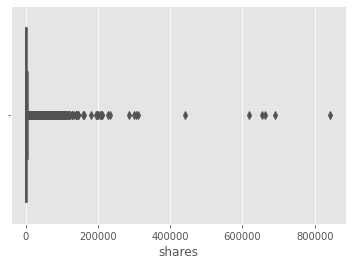

In [97]:

sns.boxplot(datos['shares'])
plt.show()

In [98]:
# primero ordenamos nuneros de menor a mayor para relaizar un procesado de datos anomalos ya que como se ve en los 
# graficos anteriores se tiene muchos
numeros_escalados = datos.sort_values('shares') 
q1 = numeros_escalados['shares'].quantile(q=0.25) 
q3 = numeros_escalados['shares'].quantile(q=0.75) 
# calculo de rango intercuartil
iqr = q3-q1
print("q1 =", q1 , " ", "iqr = ", iqr )

q1 = 946.0   iqr =  1854.0


In [99]:
interno = q1-(iqr*1.5) 
print("borde interno =", interno ) 

externo = q3+(iqr*1.5)  
print("borde externo =", externo) 

datos.info()

borde interno = -1835.0
borde externo = 5581.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 60 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   timedelta                      39644 non-null  float64
 1   n_tokens_title                 39644 non-null  float64
 2   n_tokens_content               39644 non-null  float64
 3   n_unique_tokens                39644 non-null  float64
 4   n_non_stop_words               39644 non-null  float64
 5   n_non_stop_unique_tokens       39644 non-null  float64
 6   num_hrefs                      39644 non-null  float64
 7   num_self_hrefs                 39644 non-null  float64
 8   num_imgs                       39644 non-null  float64
 9   num_videos                     39644 non-null  float64
 10  average_token_length           39644 non-null  float64
 11  num_keywords                   39644 non-null  float64
 12 

In [100]:
# Pr = post reduccion
Pr = datos[datos['shares']<=externo]

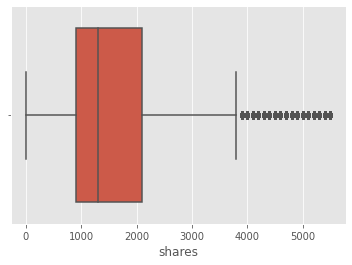

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35103 entries, 0 to 39643
Data columns (total 60 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   timedelta                      35103 non-null  float64
 1   n_tokens_title                 35103 non-null  float64
 2   n_tokens_content               35103 non-null  float64
 3   n_unique_tokens                35103 non-null  float64
 4   n_non_stop_words               35103 non-null  float64
 5   n_non_stop_unique_tokens       35103 non-null  float64
 6   num_hrefs                      35103 non-null  float64
 7   num_self_hrefs                 35103 non-null  float64
 8   num_imgs                       35103 non-null  float64
 9   num_videos                     35103 non-null  float64
 10  average_token_length           35103 non-null  float64
 11  num_keywords                   35103 non-null  float64
 12  data_channel_is_lifestyle      35103 non-null 

In [101]:
# grafico de outliers para ver como quedo shares desepues de la reduccion
sns.boxplot(Pr['shares'])
plt.show()
Pr.info()

In [102]:
mediana , media = Pr['shares'].median(), Pr['shares'].mean()
print("mediana = ", mediana, " ", "media = ", media)

mediana =  1300.0   media =  1671.9726519100932


In [103]:
# se hace un cambio para clasificar popular y inpopular mediante la mediana, si mayor
# se le asigna un 1 si es menor un 0 
Pr['shares'] = Pr['shares'].apply(lambda x: 0 if x <mediana  else 1)

In [104]:
Pr['shares'].value_counts()

1    18353
0    16750
Name: shares, dtype: int64

In [152]:
# como se puede ver del resultado anterior los datos de la varible objetivo estan relativamente bien distribuidos
# una diferencia de menos de 2.000 datos es poco considerando que se tienen mas de 35.000. por esto no sera necesario
# aplicar algun metodo de arreglo de distribucion como SMOTE o escalado.
X = Pr.drop('shares',axis=1)
Y = Pr['shares']

In [153]:
train, test, target_train, target_val = train_test_split(X, Y, test_size=0.70, random_state=0)

In [148]:
params = {
    
    'criterion':['gini','entropy'],
    'splitter':['best','random'],
    'max_depth':range(1,10,1),
    'max_leaf_nodes':range(2,10,1),
}
dt = DecisionTreeClassifier()
rs = RandomizedSearchCV(dt, param_distributions=params, scoring='accuracy', n_jobs=-1, cv=5, random_state=42)
rs.fit(X,Y)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': range(1, 10),
                                        'max_leaf_nodes': range(2, 10),
                                        'splitter': ['best', 'random']},
                   random_state=42, scoring='accuracy')

In [149]:
rs.best_params_

{'splitter': 'random',
 'max_leaf_nodes': 8,
 'max_depth': 5,
 'criterion': 'gini'}

Text(0.5, 0, 'importancia relativa a arbol de decisiones')

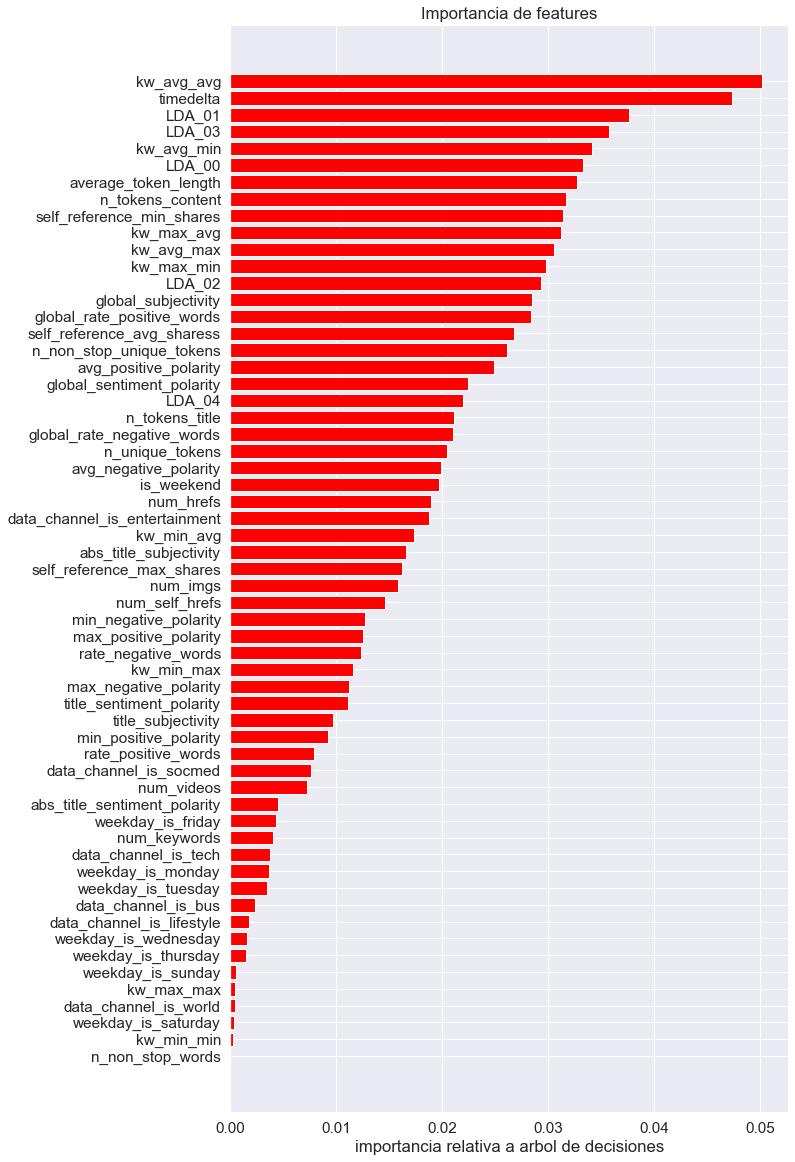

In [151]:
dt = DecisionTreeClassifier()
dt.fit(train, target_train)
dt_pred = dt.predict(test)
features = Pr.columns
importance = dt.feature_importances_
indices = np.argsort(importance)
plt.figure(1,figsize=(10,20))
plt.title('Importancia de features')
plt.barh(range(len(indices)), importance[indices], color='red', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('importancia relativa a arbol de decisiones')

[Text(197.81579036818007, 213.816, 'X[26] <= 2746.76\ngini = 0.499\nsamples = 10530\nvalue = [5054, 5476]'),
 Text(107.4163717955201, 206.56799999999998, 'X[0] <= 610.5\ngini = 0.491\nsamples = 4894\nvalue = [2775, 2119]'),
 Text(68.99307204106243, 199.32, 'X[29] <= 1885.917\ngini = 0.477\nsamples = 3791\nvalue = [2306, 1485]'),
 Text(47.06844908808489, 192.072, 'X[37] <= 0.5\ngini = 0.433\nsamples = 2019\nvalue = [1378, 641]'),
 Text(34.7532804084935, 184.824, 'X[8] <= 2.5\ngini = 0.41\nsamples = 1788\nvalue = [1273, 515]'),
 Text(22.19552766317506, 177.576, 'X[26] <= 2320.188\ngini = 0.384\nsamples = 1464\nvalue = [1085, 379]'),
 Text(9.744098090320668, 170.328, 'X[6] <= 31.5\ngini = 0.325\nsamples = 764\nvalue = [608, 156]'),
 Text(6.822155862443797, 163.07999999999998, 'X[10] <= 4.528\ngini = 0.315\nsamples = 751\nvalue = [604, 147]'),
 Text(3.017319037501853, 155.832, 'X[20] <= 262.512\ngini = 0.43\nsamples = 134\nvalue = [92, 42]'),
 Text(2.117416868422353, 148.584, 'X[39] <= 0.0

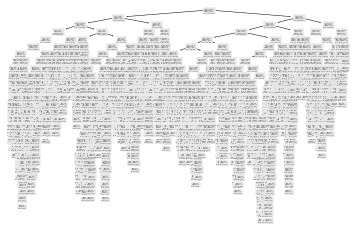

In [112]:
tree.plot_tree(dt) 

In [140]:
print("accuracy: ", accuracy_score(target_val,dt_pred))
print("f1 score: ", f1_score(target_val,dt_pred,average=None))

accuracy:  0.5740446831888658
f1 score:  [0.54963212 0.59594673]


In [129]:
naiveClassifier=GaussianNB()
naiveClassifier.fit(train, target_train)
predicted_y = naiveClassifier.predict(test)

In [130]:
from sklearn.metrics import (accuracy_score, log_loss, classification_report,f1_score,confusion_matrix)

<AxesSubplot:xlabel='predecida', ylabel='Actual'>

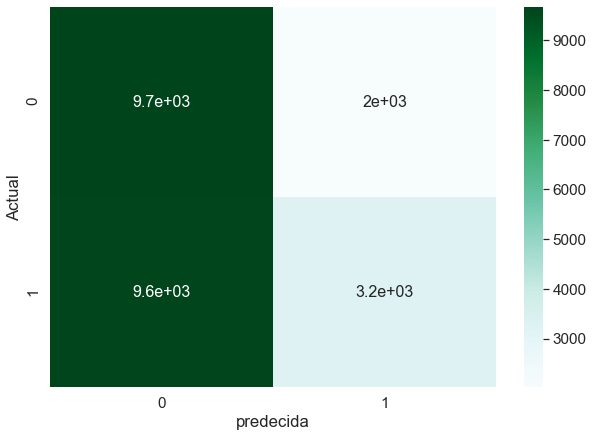

In [144]:
data = confusion_matrix(target_val,naiveClassifier_pred)
df_cm = pd.DataFrame(data, columns=np.unique(target_val), index = np.unique(target_val))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'predecida'
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, cmap="BuGn", annot=True,annot_kws={"size": 16})

In [142]:
print("naive bayes")
print("accuracy: ", accuracy_score(target_val,predicted_y))
print("f1 score: ", f1_score(target_val,predicted_y,average=None))
print("....................................................................")
print("arbol de deciciones")
print("accuracy: ", accuracy_score(target_val,dt_pred))
print("f1 score: ", f1_score(target_val,dt_pred,average=None))

naive bayes
accuracy:  0.5260651935050665
f1 score:  [0.62434682 0.35813492]
....................................................................
arbol de deciciones
accuracy:  0.5740446831888658
f1 score:  [0.54963212 0.59594673]
